In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Read the CSV into a Pandas DataFrame
dataset = pd.read_csv('Final_Dataset.csv')
dataset.head()

,region,year,lifetime_risk,mortality_ratio,private_expenditure,government_expenditure,gdp_capita
0,East Asia & Pacific,2000,0.21,113,29.52,4.34,7178.89
1,Europe & Central Asia,2000,0.05,33,24.49,5.88,22220.70
2,Latin America & Caribbean,2000,0.29,99,56.91,2.53,11458.67
3,Middle East & North Africa,2000,0.38,113,44.46,2.48,13554.73
4,North America,2000,0.02,12,54.50,5.56,45146.13


In [3]:
# Use Pandas get_dummies to convert categorical data
region = pd.get_dummies(dataset)
region.head(10)

,year,lifetime_risk,mortality_ratio,private_expenditure,government_expenditure,gdp_capita,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
0,2000,0.21,113,29.52,4.34,7178.89,1,0,0,0,0,0,0
1,2000,0.05,33,24.49,5.88,22220.70,0,1,0,0,0,0,0
2,2000,0.29,99,56.91,2.53,11458.67,0,0,1,0,0,0,0
3,2000,0.38,113,44.46,2.48,13554.73,0,0,0,1,0,0,0
4,2000,0.02,12,54.50,5.56,45146.13,0,0,0,0,1,0,0
5,2000,1.45,388,73.61,0.87,2520.24,0,0,0,0,0,1,0
6,2000,4.72,846,60.33,1.72,2379.29,0,0,0,0,0,0,1
7,2001,0.20,110,29.90,4.36,7386.65,1,0,0,0,0,0,0
8,2001,0.05,32,24.36,6.04,22723.10,0,1,0,0,0,0,0
9,2001,0.27,95,56.79,2.60,11377.76,0,0,1,0,0,0,0


In [4]:
# Set x and y
X = region.drop("mortality_ratio", axis=1)
y = region[("mortality_ratio")]

In [5]:
# Split between train and test
from sklearn.model_selection import train_test_split

In [6]:
# Can I use historical data to predict recent data (and potentially future data?)
X_train = region[region['year'] < 2010].drop("mortality_ratio", axis=1)
y_train = region[region['year'] < 2010]['mortality_ratio']
X_test = region[region['year'] >= 2010].drop("mortality_ratio", axis=1)
y_test = region[region['year'] >= 2010]['mortality_ratio']

In [7]:
X_test.head()

,year,lifetime_risk,private_expenditure,government_expenditure,gdp_capita,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
70,2010,0.13,30.64,4.38,11964.95,1,0,0,0,0,0,0
71,2010,0.03,22.26,7.03,27035.97,0,1,0,0,0,0,0
72,2010,0.19,55.07,3.51,13701.07,0,0,1,0,0,0,0
73,2010,0.28,46.06,2.53,16802.83,0,0,0,1,0,0,0
74,2010,0.03,49.87,7.94,48516.51,0,0,0,0,1,0,0


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import graphviz 
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

C:\Users\clsch\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [9]:
model = RandomForestRegressor(max_depth=2, random_state=0)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Fit the model
model.fit(X_train, y_train)

C:\Users\clsch\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [12]:
model.score(X_test, y_test)

0.9192842358444658

In [13]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor(random_state = 41)
param_grid = {'max_depth': [2, 3, 5, 8], 'n_estimators': [2, 5, 10, 12]}
gs_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
gs_model.fit(X_train, y_train)
print(gs_model.best_params_)
gs_predictions = gs_model.predict(X_test)

{'max_depth': 5, 'n_estimators': 2}


In [26]:
# Extract single tree
estimator = model.estimators_[5]

In [27]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = feature_names,
                #class_names = region.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [28]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

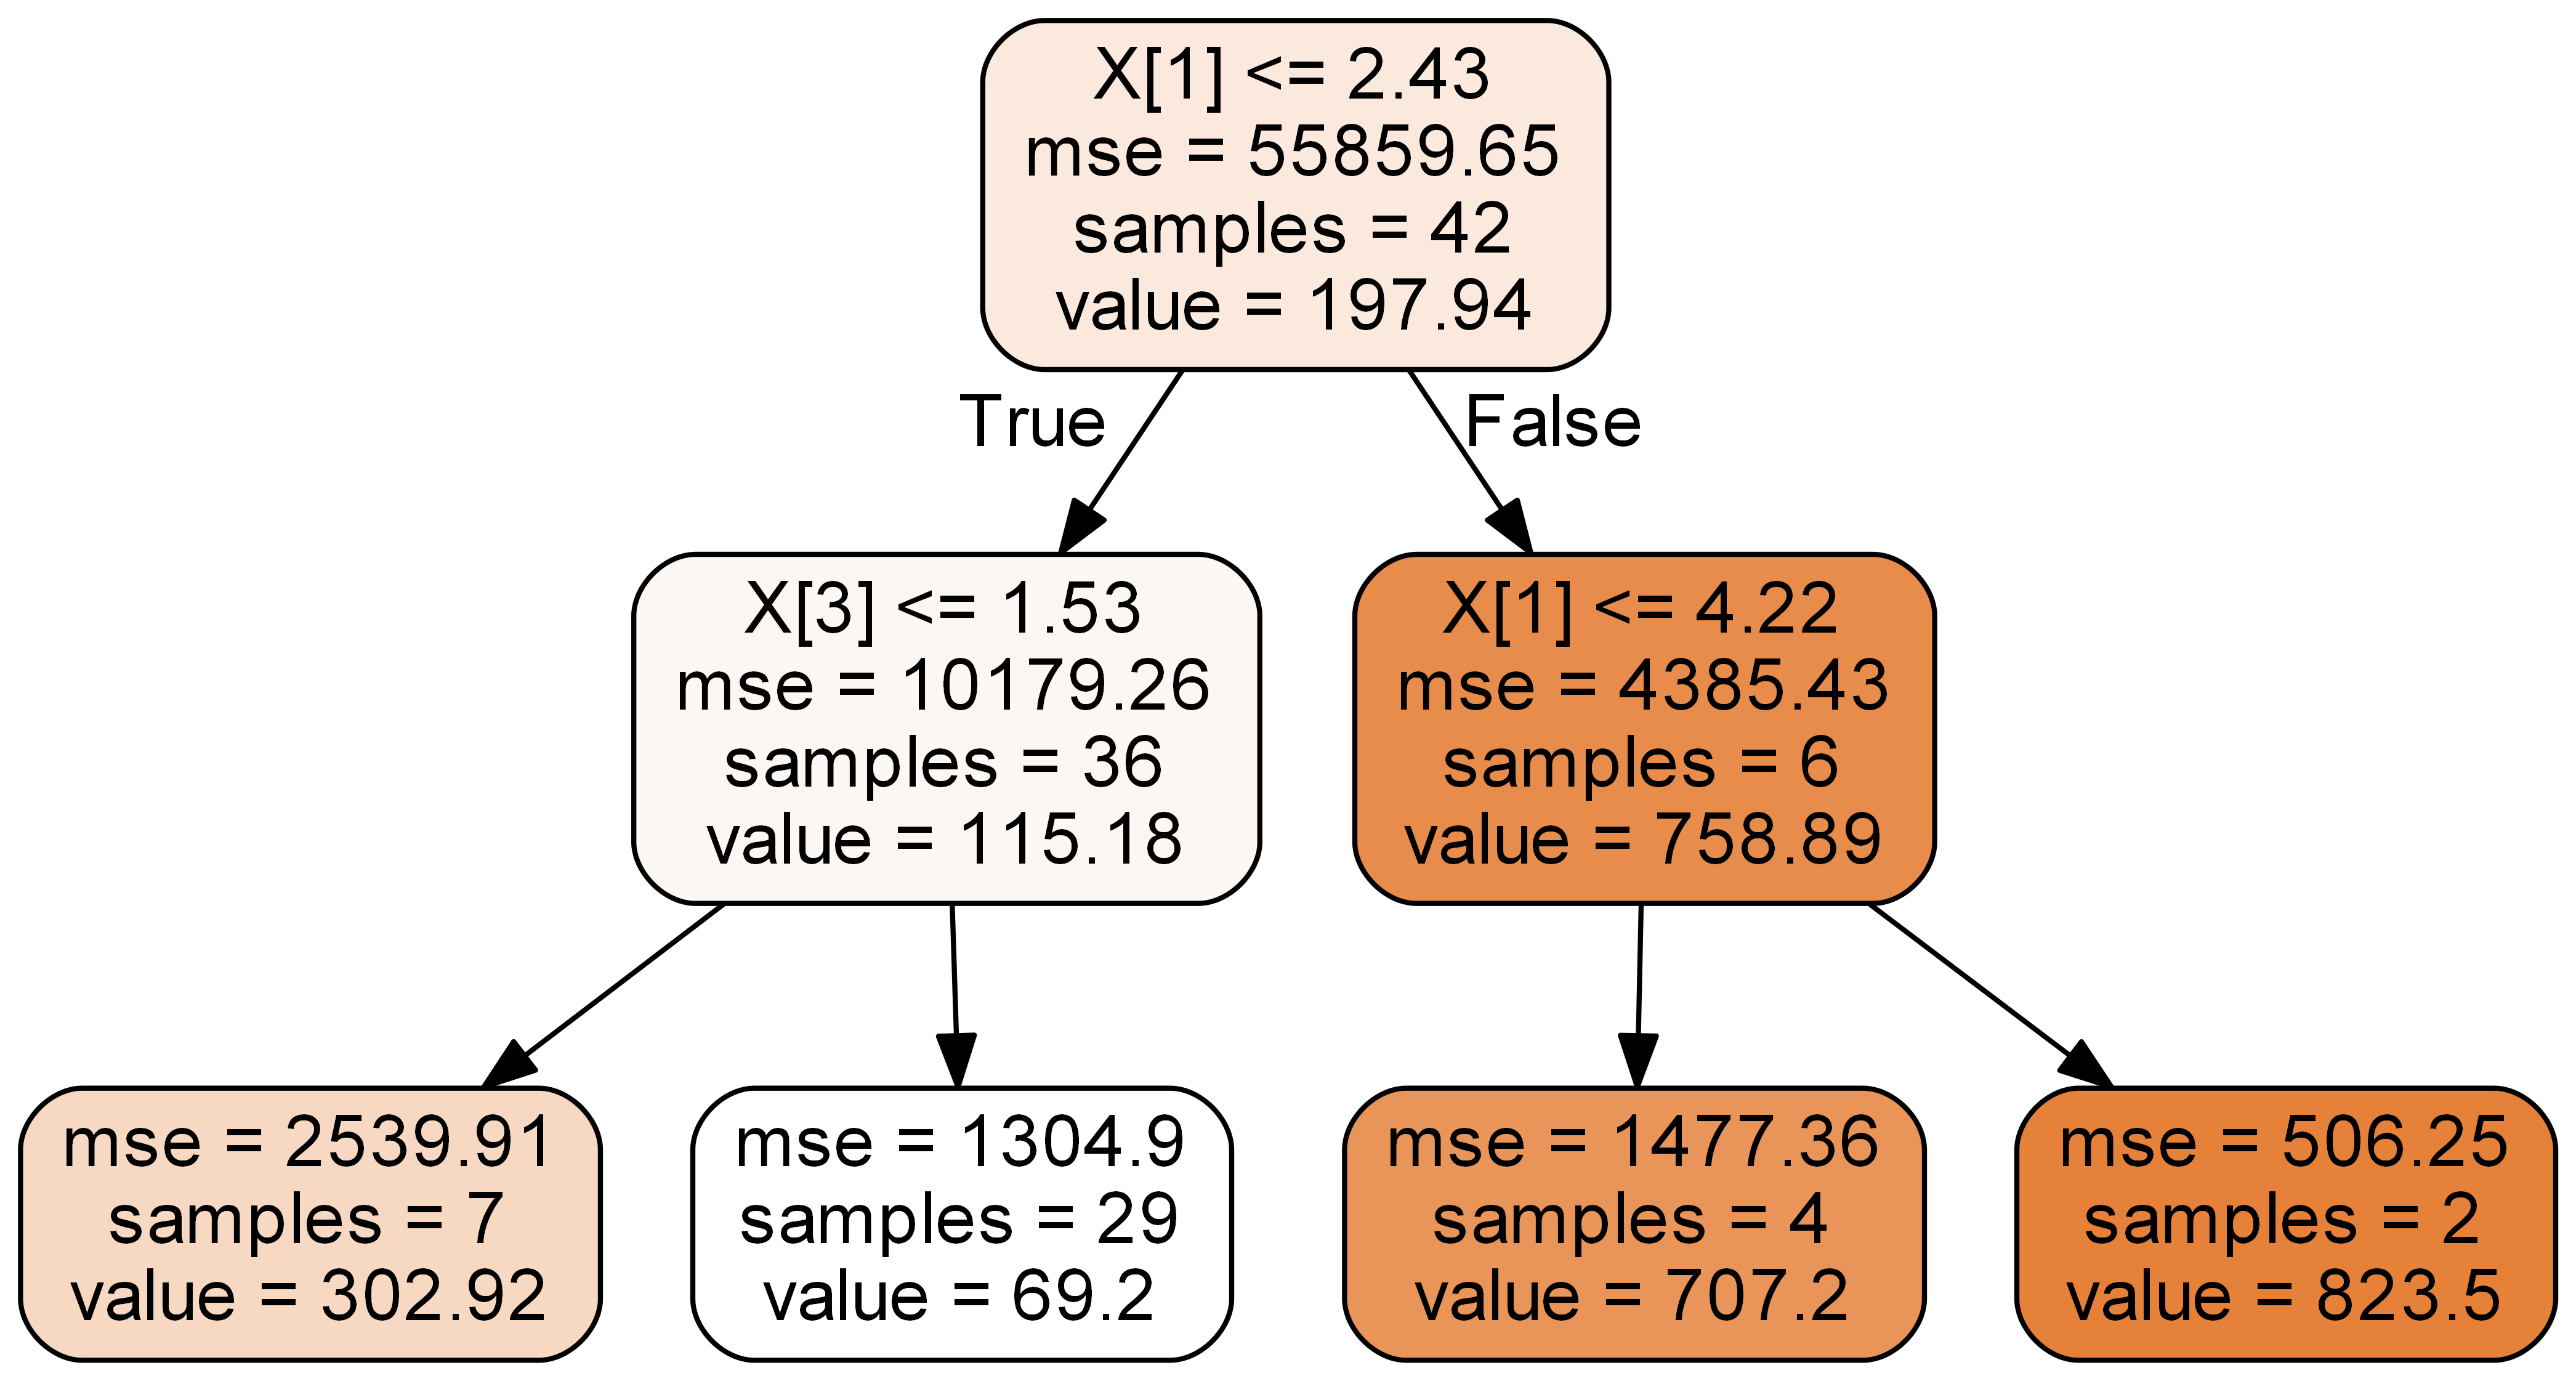

In [29]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [18]:
# Calculate the model.predict
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [19]:
# Calculate the model.score (R squared)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"R-squared (R2) Train: {training_score}")
print(f"R-squared (R2) Test: {testing_score}")

R-squared (R2) Train: 0.9789035043276951
R-squared (R2) Test: 0.9192842358444658


In [20]:
# Run mean scored error
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

print(f"Mean Squared Error (MSE) Train: {mse_train}")
print(f"Mean Squared Error (MSE) Test: {mse_test}")

Mean Squared Error (MSE) Train: 1217.660733287409
Mean Squared Error (MSE) Test: 2812.463609542599
